In [21]:
import torch as t
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x_data = t.linspace(-5, 5, 500)
mu, sigma = t.tensor(0.0), t.tensor(0.2)
noise =t.tensor([t.normal(mu, sigma) for _ in range(len(x_data))])
y_data = t.sin(x_data) + noise

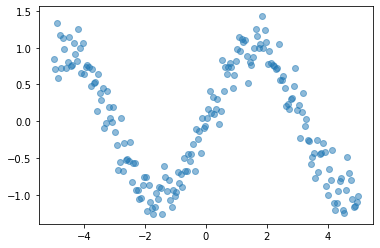

In [15]:
plt.scatter(x_data, y_data, alpha=0.5)
plt.show()

In [57]:
class NN(nn.Module):
    def __init__(self, episode_n, lr, n=32):
        super().__init__()
        # input data
        self.episode_n = episode_n
        self.linear1 = nn.Linear(1, n)
        self.linear2 = nn.Linear(n, 1)
        
        # activation Function
        self.relu = nn.ReLU()
        self.optimizer = t.optim.SGD(self.parameters(), lr=lr)
        # inner
    def forward(self, _input):
        hidden = self.linear1(_input)
        hidden = self.relu(hidden)
        output = self.linear2(hidden)
        return output
    def learn(self, x_data, y_data):
        for _ in range(self.episode_n):
            y_pred = self.forward(x_data)
            loss = torch.mean((y_data - y_pred) ** 2)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()

In [68]:
net = NN(1000, 0.01, 64)
net.learn(x_data.reshape(500,1), y_data.reshape(500, 1))

In [69]:
y_pred = net.forward(x_data.reshape(500,1))

In [72]:
list(net.parameters())

[Parameter containing:
 tensor([[-0.7684],
         [-0.2922],
         [ 0.7175],
         [ 0.8531],
         [ 0.6012],
         [-0.5204],
         [ 0.1246],
         [ 0.1990],
         [ 0.7127],
         [-0.2268],
         [-0.8698],
         [ 0.3305],
         [ 0.5047],
         [ 0.4121],
         [-0.5171],
         [ 0.0801],
         [-0.8614],
         [-0.1268],
         [ 0.3398],
         [-0.2080],
         [ 0.7819],
         [ 0.5634],
         [-0.5464],
         [ 0.4156],
         [-0.8978],
         [ 0.2372],
         [-0.8673],
         [-0.9311],
         [-0.3600],
         [-0.2167],
         [ 0.3539],
         [ 0.2845],
         [ 0.3172],
         [ 0.9617],
         [ 0.4170],
         [-0.9419],
         [-0.5417],
         [-0.8296],
         [ 0.6005],
         [-0.0408],
         [ 0.3290],
         [ 0.1057],
         [-0.8914],
         [ 0.4505],
         [-0.3951],
         [-0.8539],
         [ 0.4179],
         [-0.6053],
         [-0.4940

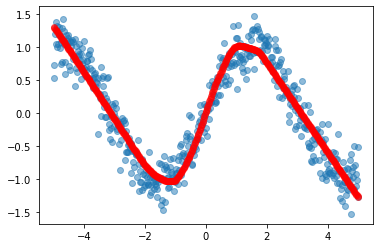

In [70]:
plt.scatter(x_data.detach().numpy(), y_data.detach().numpy(), alpha=0.5)
plt.scatter(x_data.detach().numpy(), y_pred.detach().numpy(), color='r', alpha=0.5)